In [1]:
# SVMs are particularly poerful and flexible class of supervised algorithms for both classification and regression

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# using seaborn plotting defaults
import seaborn  as sns; sns.set_theme()

(-1.0, 3.5)

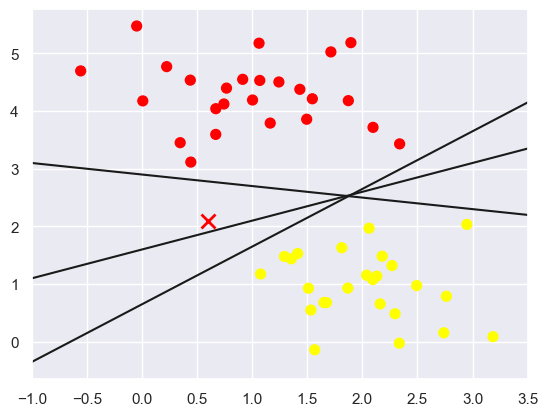

In [3]:
from sklearn.datasets._samples_generator import make_blobs
x, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
xfit = np.linspace(-1, 3.5)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m*xfit+b, '-k')
plt.xlim(-1, 3.5)

In [4]:
# Fitting a support vector machines

In [5]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(x, y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
# To visualize what's happening here, let's create a convinience function that will plot SVM decision boundaries

In [7]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    # Plot the decision function for a 2d svc
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    y, x = np.meshgrid(y, x)
    xy = np.vstack([x.ravel(), y.ravel()]).T
    P = model.decision_function(xy).reshape(x.shape)

    # Plot the decision boundary and margins
    ax.contour(x, y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

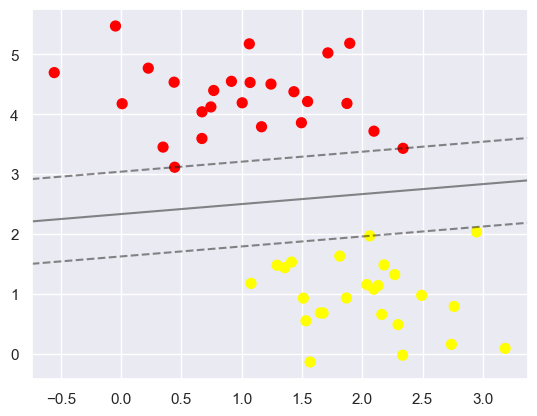

In [8]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [9]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [10]:
# A key to this classifier's success is that for the fit only the position of the 
# support vectors matter, any points further from the margin that are on the correct
# side do not modify the fit

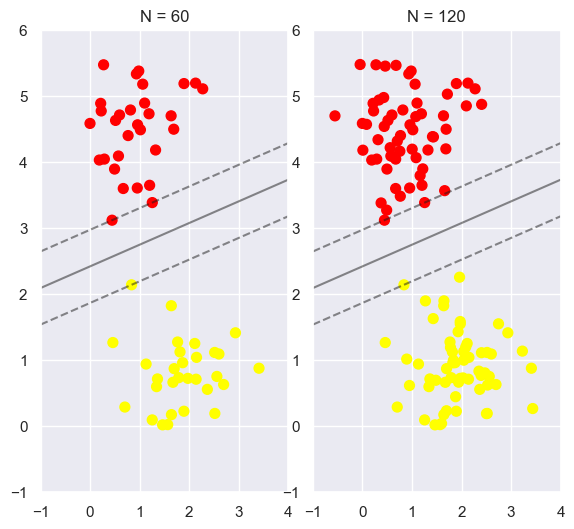

In [11]:
def plot_svm(N=10, ax=None):
    x, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    x = x[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(x, y)

    ax = ax or plt.gca()
    ax.scatter(x[:,0], x[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [12]:
# We can use ipython's interactive widgets to view this features of the SVM model interactively

In [13]:
from ipywidgets import interact, fixed

In [14]:
# Beyond linear boundaries : kernel SVM
# To motivate the need for kernels, let's look at some data that is not linearly separable

In [15]:
from sklearn.datasets._samples_generator import make_circles

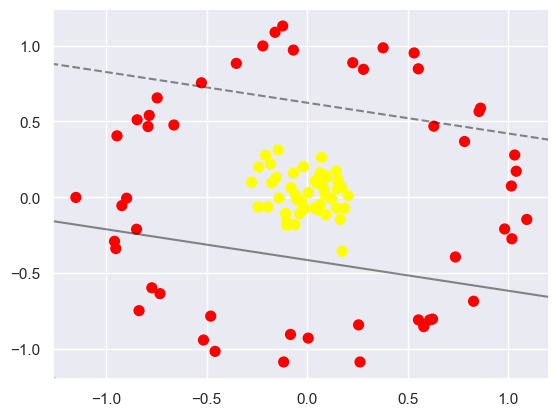

In [16]:
x, y = make_circles(100, factor=0.1, noise=0.1)
clf = SVC(kernel='linear').fit(x, y)

plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

In [17]:
# A linear classifier performs poorly for nonlinear boundaries

In [18]:
# Taking example from basis function regression, we can try to project this non linear data into higher dimensions

In [19]:
# A linear separator would be sufficeint for such kind of data

In [20]:
# Let's compute a radial basis function, centerd on the middle clump

In [21]:
r = np.exp(-(x**2).sum(1))

In [22]:
from mpl_toolkits import mplot3d

In [23]:
def plot_3D(elev=30, azim=30, x=x, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(x[:, 0], x[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

In [24]:
# kernel trick : a fit one kernel transformed data can be done implictly

In [25]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(x,y)

SVC(C=1000000.0)

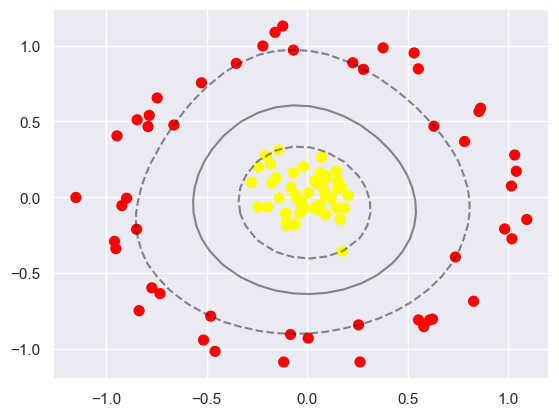

In [27]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none')

In [28]:
# Tuning the SVM : Softening margins

In [29]:
# What if the data has overlaps?

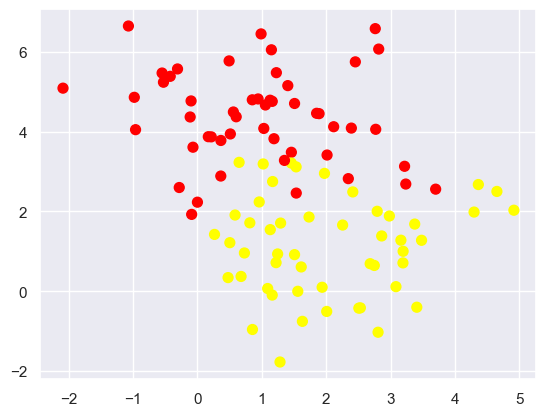

In [30]:
x, y =  make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')

In [31]:
# To handle this case svm has a bit of fudge factor that  softens the margins, it allows some of the
# points to keep in to the margin if it allows a better fit

In [32]:
# The hardness of the margin is controlled by a tuning parameter, most often known as C
# For very large C, the margin is hard, and points cannot lie in it
# for smaller C, the margin is softer, and can grow to encompass some points

In [33]:
x,y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

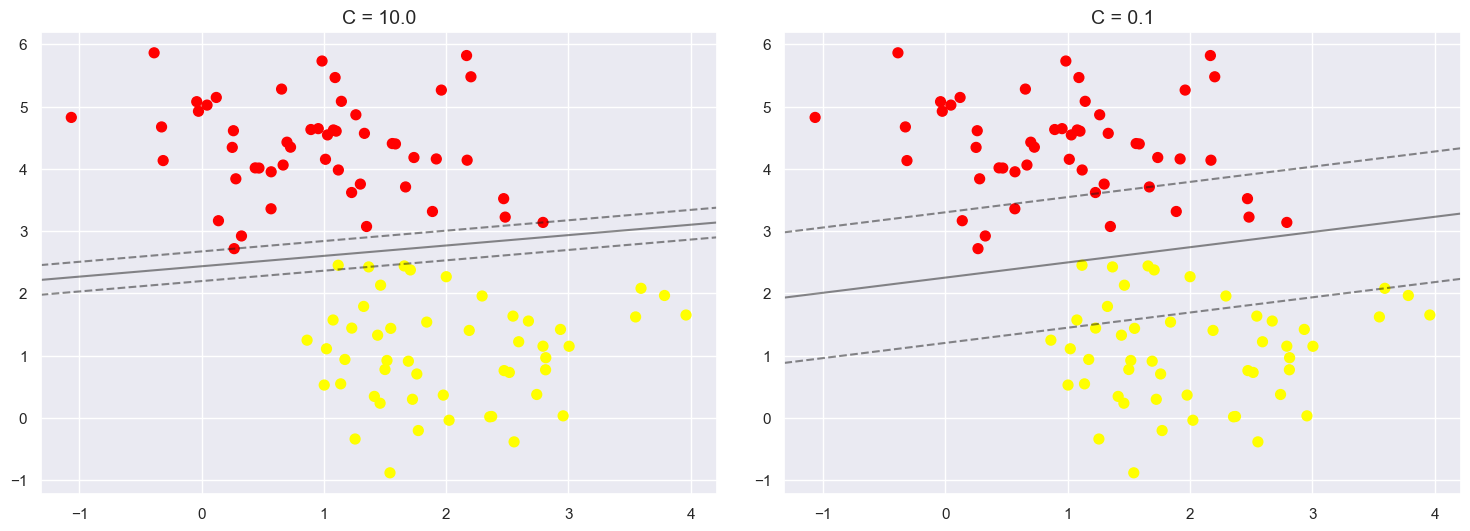

In [35]:
fig, ax = plt.subplots(1,2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(x, y)
    axi.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [37]:
# The effect of C parameter on the support vector fit
# The optimal value of C parameter will depend on your dataset
# and should be trained via cross-validation on similar procedure